In [4]:
!python --version

Python 3.10.13


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import json
import joblib
import gc

pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("data_after_aggregates_v2.csv")
data.shape

/var/folders/5g/8_7mzzxs1wj21pgy83mfqcvw0000gn/T/ipykernel_46877/3681908233.py:1: DtypeWarning: Columns (9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data_after_aggregates_v2.csv")


(786363, 163)

In [4]:
data.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate,countryMismatch,CVVMismatch,isOverspent,daysSinceLastAddressChange,daysSinceAccountOpen,recency_by_customerId,age_by_customerId,count_by_customerId,sum_by_customerId,avg_by_customerId,recency_by_creditLimit,age_by_creditLimit,count_by_creditLimit,sum_by_creditLimit,avg_by_creditLimit,recency_by_merchantName,age_by_merchantName,count_by_merchantName,sum_by_merchantName,avg_by_merchantName,recency_by_acqCountry,age_by_acqCountry,count_by_acqCountry,sum_by_acqCountry,avg_by_acqCountry,recency_by_merchantCountryCode,age_by_merchantCountryCode,count_by_merchantCountryCode,sum_by_merchantCountryCode,avg_by_merchantCountryCode,recency_by_posEntryMode,age_by_posEntryMode,count_by_posEntryMode,sum_by_posEntryMode,avg_by_posEntryMode,recency_by_posConditionCode,age_by_posConditionCode,count_by_posConditionCode,sum_by_posConditionCode,avg_by_posConditionCode,recency_by_merchantCategoryCode,age_by_merchantCategoryCode,count_by_merchantCategoryCode,sum_by_merchantCategoryCode,avg_by_merchantCategoryCode,recency_by_currentExpDate,age_by_currentExpDate,count_by_currentExpDate,sum_by_currentExpDate,avg_by_currentExpDate,recency_by_cardCVV,age_by_cardCVV,count_by_cardCVV,sum_by_cardCVV,avg_by_cardCVV,recency_by_enteredCVV,age_by_enteredCVV,count_by_enteredCVV,sum_by_enteredCVV,avg_by_enteredCVV,recency_by_cardLast4Digits,age_by_cardLast4Digits,count_by_cardLast4Digits,sum_by_cardLast4Digits,avg_by_cardLast4Digits,recency_by_transactionType,age_by_transactionType,count_by_transactionType,sum_by_transactionType,avg_by_transactionType,recency_by_cardPresent,age_by_cardPresent,count_by_cardPresent,sum_by_cardPresent,avg_by_cardPresent,recency_by_expirationDateKeyInMatch,age_by_expirationDateKeyInMatch,count_by_expirationDateKeyInMatch,sum_by_expirationDateKeyInMatch,avg_by_expirationDateKeyInMatch,recency_by_customerId_creditLimit,age_by_customerId_creditLimit,count_by_customerId_creditLimit,sum_by_customerId_creditLimit,avg_by_customerId_creditLimit,recency_by_customerId_merchantName,age_by_customerId_merchantName,count_by_customerId_merchantName,sum_by_customerId_merchantName,avg_by_customerId_merchantName,recency_by_customerId_acqCountry,age_by_customerId_acqCountry,count_by_customerId_acqCountry,sum_by_customerId_acqCountry,avg_by_customerId_acqCountry,recency_by_customerId_merchantCountryCode,age_by_customerId_merchantCountryCode,count_by_customerId_merchantCountryCode,sum_by_customerId_merchantCountryCode,avg_by_customerId_merchantCountryCode,recency_by_customerId_posEntryMode,age_by_customerId_posEntryMode,count_by_customerId_posEntryMode,sum_by_customerId_posEntryMode,avg_by_customerId_posEntryMode,recency_by_customerId_posConditionCode,age_by_customerId_posConditionCode,count_by_customerId_posConditionCode,sum_by_customerId_posConditionCode,avg_by_customerId_posConditionCode,recency_by_customerId_merchantCategoryCode,age_by_customerId_merchantCategoryCode,count_by_customerId_merchantCategoryCode,sum_by_customerId_merchantCategoryCode,avg_by_customerId_merchantCategoryCode,recency_by_customerId_currentExpDate,age_by_customerId_currentExpDate,count_by_customerId_currentExpDate,sum_by_customerId_currentExpDate,avg_by_customerId_currentExpDate,recency_by_customerId_cardCVV,age_by_customerId_cardCVV,count_by_customerId_cardCVV,sum_by_customerId_cardCVV,avg_by_customerId_cardCVV,recency_by_customerId_enteredCVV,age_by_customerId_enteredCVV,count_by_customerId_enteredCVV,sum_by_customerId_enteredCVV,avg_by_customerId_enteredCVV,recency_by_customerId_cardLast4Digits,age_by_customerId_cardLast4Digits,count_by_customerId_cardLast4Digits,sum_by_customerId_cardLast4Digits,avg_by_customerId_cardLast4Digi

In [17]:
cat_features = joblib.load("cat_features.joblib")
len(cat_features)

15

In [18]:
cat_features

['customerId',
 'creditLimit',
 'merchantName',
 'acqCountry',
 'merchantCountryCode',
 'posEntryMode',
 'posConditionCode',
 'merchantCategoryCode',
 'currentExpDate',
 'cardCVV',
 'enteredCVV',
 'cardLast4Digits',
 'transactionType',
 'cardPresent',
 'expirationDateKeyInMatch']

In [6]:
features_basic = joblib.load("features_basic.joblib")
cols_agg_acct = joblib.load("cols_agg_acct_v2.jobblib")
cols_agg_glb = joblib.load("cols_agg_glb.joblib")
cols_agg_glb = [c for c in cols_agg_glb if not ("cardPresent" in c or "expirationDateKeyInMatch" in c)]
len(features_basic), len(cols_agg_acct), len(cols_agg_glb)

(23, 65, 60)

In [7]:
features_basic

['customerId',
 'creditLimit',
 'availableMoney',
 'transactionAmount',
 'merchantName',
 'acqCountry',
 'merchantCountryCode',
 'posEntryMode',
 'posConditionCode',
 'merchantCategoryCode',
 'currentExpDate',
 'cardCVV',
 'enteredCVV',
 'cardLast4Digits',
 'transactionType',
 'currentBalance',
 'cardPresent',
 'expirationDateKeyInMatch',
 'daysSinceLastAddressChange',
 'daysSinceAccountOpen',
 'countryMismatch',
 'CVVMismatch',
 'isOverspent']

In [8]:
features = features_basic + cols_agg_acct + cols_agg_glb
len(features)

148

In [9]:
data[data.duplicated(subset=["transactionDateTime", "customerId", "currentBalance"], keep=False)]

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate,countryMismatch,CVVMismatch,isOverspent,daysSinceLastAddressChange,daysSinceAccountOpen,recency_by_customerId,age_by_customerId,count_by_customerId,sum_by_customerId,avg_by_customerId,recency_by_creditLimit,age_by_creditLimit,count_by_creditLimit,sum_by_creditLimit,avg_by_creditLimit,recency_by_merchantName,age_by_merchantName,count_by_merchantName,sum_by_merchantName,avg_by_merchantName,recency_by_acqCountry,age_by_acqCountry,count_by_acqCountry,sum_by_acqCountry,avg_by_acqCountry,recency_by_merchantCountryCode,age_by_merchantCountryCode,count_by_merchantCountryCode,sum_by_merchantCountryCode,avg_by_merchantCountryCode,recency_by_posEntryMode,age_by_posEntryMode,count_by_posEntryMode,sum_by_posEntryMode,avg_by_posEntryMode,recency_by_posConditionCode,age_by_posConditionCode,count_by_posConditionCode,sum_by_posConditionCode,avg_by_posConditionCode,recency_by_merchantCategoryCode,age_by_merchantCategoryCode,count_by_merchantCategoryCode,sum_by_merchantCategoryCode,avg_by_merchantCategoryCode,recency_by_currentExpDate,age_by_currentExpDate,count_by_currentExpDate,sum_by_currentExpDate,avg_by_currentExpDate,recency_by_cardCVV,age_by_cardCVV,count_by_cardCVV,sum_by_cardCVV,avg_by_cardCVV,recency_by_enteredCVV,age_by_enteredCVV,count_by_enteredCVV,sum_by_enteredCVV,avg_by_enteredCVV,recency_by_cardLast4Digits,age_by_cardLast4Digits,count_by_cardLast4Digits,sum_by_cardLast4Digits,avg_by_cardLast4Digits,recency_by_transactionType,age_by_transactionType,count_by_transactionType,sum_by_transactionType,avg_by_transactionType,recency_by_cardPresent,age_by_cardPresent,count_by_cardPresent,sum_by_cardPresent,avg_by_cardPresent,recency_by_expirationDateKeyInMatch,age_by_expirationDateKeyInMatch,count_by_expirationDateKeyInMatch,sum_by_expirationDateKeyInMatch,avg_by_expirationDateKeyInMatch,recency_by_customerId_creditLimit,age_by_customerId_creditLimit,count_by_customerId_creditLimit,sum_by_customerId_creditLimit,avg_by_customerId_creditLimit,recency_by_customerId_merchantName,age_by_customerId_merchantName,count_by_customerId_merchantName,sum_by_customerId_merchantName,avg_by_customerId_merchantName,recency_by_customerId_acqCountry,age_by_customerId_acqCountry,count_by_customerId_acqCountry,sum_by_customerId_acqCountry,avg_by_customerId_acqCountry,recency_by_customerId_merchantCountryCode,age_by_customerId_merchantCountryCode,count_by_customerId_merchantCountryCode,sum_by_customerId_merchantCountryCode,avg_by_customerId_merchantCountryCode,recency_by_customerId_posEntryMode,age_by_customerId_posEntryMode,count_by_customerId_posEntryMode,sum_by_customerId_posEntryMode,avg_by_customerId_posEntryMode,recency_by_customerId_posConditionCode,age_by_customerId_posConditionCode,count_by_customerId_posConditionCode,sum_by_customerId_posConditionCode,avg_by_customerId_posConditionCode,recency_by_customerId_merchantCategoryCode,age_by_customerId_merchantCategoryCode,count_by_customerId_merchantCategoryCode,sum_by_customerId_merchantCategoryCode,avg_by_customerId_merchantCategoryCode,recency_by_customerId_currentExpDate,age_by_customerId_currentExpDate,count_by_customerId_currentExpDate,sum_by_customerId_currentExpDate,avg_by_customerId_currentExpDate,recency_by_customerId_cardCVV,age_by_customerId_cardCVV,count_by_customerId_cardCVV,sum_by_customerId_cardCVV,avg_by_customerId_cardCVV,recency_by_customerId_enteredCVV,age_by_customerId_enteredCVV,count_by_customerId_enteredCVV,sum_by_customerId_enteredCVV,avg_by_customerId_enteredCVV,recency_by_customerId_cardLast4Digits,age_by_customerId_cardLast4Digits,count_by_customerId_cardLast4Digits,sum_by_customerId_cardLast4Digits,avg_by_customerId_cardLast4Digi

In [10]:
data.sort_values(["transactionDateTime", "customerId", "currentBalance"], inplace=True)
data["transactionDateTime"].is_monotonic_increasing

True

In [11]:
data.shape

(786363, 163)

In [12]:
data.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate,countryMismatch,CVVMismatch,isOverspent,daysSinceLastAddressChange,daysSinceAccountOpen,recency_by_customerId,age_by_customerId,count_by_customerId,sum_by_customerId,avg_by_customerId,recency_by_creditLimit,age_by_creditLimit,count_by_creditLimit,sum_by_creditLimit,avg_by_creditLimit,recency_by_merchantName,age_by_merchantName,count_by_merchantName,sum_by_merchantName,avg_by_merchantName,recency_by_acqCountry,age_by_acqCountry,count_by_acqCountry,sum_by_acqCountry,avg_by_acqCountry,recency_by_merchantCountryCode,age_by_merchantCountryCode,count_by_merchantCountryCode,sum_by_merchantCountryCode,avg_by_merchantCountryCode,recency_by_posEntryMode,age_by_posEntryMode,count_by_posEntryMode,sum_by_posEntryMode,avg_by_posEntryMode,recency_by_posConditionCode,age_by_posConditionCode,count_by_posConditionCode,sum_by_posConditionCode,avg_by_posConditionCode,recency_by_merchantCategoryCode,age_by_merchantCategoryCode,count_by_merchantCategoryCode,sum_by_merchantCategoryCode,avg_by_merchantCategoryCode,recency_by_currentExpDate,age_by_currentExpDate,count_by_currentExpDate,sum_by_currentExpDate,avg_by_currentExpDate,recency_by_cardCVV,age_by_cardCVV,count_by_cardCVV,sum_by_cardCVV,avg_by_cardCVV,recency_by_enteredCVV,age_by_enteredCVV,count_by_enteredCVV,sum_by_enteredCVV,avg_by_enteredCVV,recency_by_cardLast4Digits,age_by_cardLast4Digits,count_by_cardLast4Digits,sum_by_cardLast4Digits,avg_by_cardLast4Digits,recency_by_transactionType,age_by_transactionType,count_by_transactionType,sum_by_transactionType,avg_by_transactionType,recency_by_cardPresent,age_by_cardPresent,count_by_cardPresent,sum_by_cardPresent,avg_by_cardPresent,recency_by_expirationDateKeyInMatch,age_by_expirationDateKeyInMatch,count_by_expirationDateKeyInMatch,sum_by_expirationDateKeyInMatch,avg_by_expirationDateKeyInMatch,recency_by_customerId_creditLimit,age_by_customerId_creditLimit,count_by_customerId_creditLimit,sum_by_customerId_creditLimit,avg_by_customerId_creditLimit,recency_by_customerId_merchantName,age_by_customerId_merchantName,count_by_customerId_merchantName,sum_by_customerId_merchantName,avg_by_customerId_merchantName,recency_by_customerId_acqCountry,age_by_customerId_acqCountry,count_by_customerId_acqCountry,sum_by_customerId_acqCountry,avg_by_customerId_acqCountry,recency_by_customerId_merchantCountryCode,age_by_customerId_merchantCountryCode,count_by_customerId_merchantCountryCode,sum_by_customerId_merchantCountryCode,avg_by_customerId_merchantCountryCode,recency_by_customerId_posEntryMode,age_by_customerId_posEntryMode,count_by_customerId_posEntryMode,sum_by_customerId_posEntryMode,avg_by_customerId_posEntryMode,recency_by_customerId_posConditionCode,age_by_customerId_posConditionCode,count_by_customerId_posConditionCode,sum_by_customerId_posConditionCode,avg_by_customerId_posConditionCode,recency_by_customerId_merchantCategoryCode,age_by_customerId_merchantCategoryCode,count_by_customerId_merchantCategoryCode,sum_by_customerId_merchantCategoryCode,avg_by_customerId_merchantCategoryCode,recency_by_customerId_currentExpDate,age_by_customerId_currentExpDate,count_by_customerId_currentExpDate,sum_by_customerId_currentExpDate,avg_by_customerId_currentExpDate,recency_by_customerId_cardCVV,age_by_customerId_cardCVV,count_by_customerId_cardCVV,sum_by_customerId_cardCVV,avg_by_customerId_cardCVV,recency_by_customerId_enteredCVV,age_by_customerId_enteredCVV,count_by_customerId_enteredCVV,sum_by_customerId_enteredCVV,avg_by_customerId_enteredCVV,recency_by_customerId_cardLast4Digits,age_by_customerId_cardLast4Digits,count_by_customerId_cardLast4Digits,sum_by_customerId_cardLast4Digits,avg_by_customerId_cardLast4Digi

In [13]:
test_size = int(data.shape[0] * 0.1)
test_size

78636

In [29]:
from sklearn.model_selection import TimeSeriesSplit

# tscv = TimeSeriesSplit(max_train_size=100_000, test_size=10_000) # quick testing
# tscv = TimeSeriesSplit(max_train_size=3*test_size, test_size=test_size) # limit train size
tscv = TimeSeriesSplit(n_splits=5, test_size=test_size)

assert data["transactionDateTime"].is_monotonic_increasing

for i, (train_index, test_index) in enumerate(tscv.split(data)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}  size={len(train_index)}")
    print(f"  Test:  index={test_index}  size={len(test_index)}")

Fold 0:
  Train: index=[     0      1      2 ... 393180 393181 393182]  size=393183
  Test:  index=[393183 393184 393185 ... 471816 471817 471818]  size=78636
Fold 1:
  Train: index=[     0      1      2 ... 471816 471817 471818]  size=471819
  Test:  index=[471819 471820 471821 ... 550452 550453 550454]  size=78636
Fold 2:
  Train: index=[     0      1      2 ... 550452 550453 550454]  size=550455
  Test:  index=[550455 550456 550457 ... 629088 629089 629090]  size=78636
Fold 3:
  Train: index=[     0      1      2 ... 629088 629089 629090]  size=629091
  Test:  index=[629091 629092 629093 ... 707724 707725 707726]  size=78636
Fold 4:
  Train: index=[     0      1      2 ... 707724 707725 707726]  size=707727
  Test:  index=[707727 707728 707729 ... 786360 786361 786362]  size=78636


In [2]:
78636 / (78636 + 707727)

0.0999996184968011

### CatBboost

In [30]:
gc.collect()

503

In [31]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score

verbose=True

res_lst = []
assert data["transactionDateTime"].is_monotonic_increasing
for i, (train_index, test_index) in enumerate(tscv.split(data)):
    # if i < 4:
    #     continue
    
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}  size={len(train_index)}")
    print(f"  Test:  index={test_index}  size={len(test_index)}")

    df_train = data.iloc[train_index,:]
    df_test = data.iloc[test_index,:]
    assert df_train["transactionDateTime"].max() <= df_test["transactionDateTime"].min() 

    random_seed = i
    df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=random_seed)

    df_train_frd = df_train[df_train["isFraud"]==True]
    df_train_lgt = df_train[df_train["isFraud"]==False]
    df_train_lgt = df_train_lgt.sample(n=df_train_frd.shape[0]*19, random_state=random_seed) # to make fraud rate 5%

    df_train = pd.concat([df_train_frd, df_train_lgt])
    df_train = df_train.sample(frac=1.0, random_state=random_seed)

    X_train, y_train = df_train[features], df_train["isFraud"]
    X_val, y_val = df_val[features], df_val["isFraud"]
    X_test, y_test = df_test[features], df_test["isFraud"]

    print(X_train.shape, X_val.shape, X_test.shape)

    pool_train = Pool(X_train, y_train, cat_features=cat_features)
    pool_val = Pool(X_val, y_val, cat_features=cat_features)
    pool_test = Pool(X_test, y_test, cat_features=cat_features)

    cb_reg = CatBoostClassifier(
                            custom_metric=["AUC"],
                            random_state=random_seed, 
                            verbose=verbose)
    cb_reg.fit(pool_train, eval_set=pool_val)

    best_score_train = cb_reg.get_best_score()

    best_iteration_train = cb_reg.get_best_iteration()

    cb_preds = cb_reg.predict_proba(pool_test)[:,1]
    roc_auc = roc_auc_score(y_test, cb_preds)

    shap = cb_reg.get_feature_importance(pool_test, type="ShapValues")
    df_shap = pd.DataFrame(shap[:,:-1], columns=cb_reg.feature_names_)
    fea_imp = df_shap.abs().mean().sort_values(ascending=False)

   res = {"roc_auc": roc_auc,
           "best_score_train": best_score_train,
           "best_iteration_train": best_iteration_train,
           "random_seed": random_seed,
           "fea_imp": fea_imp,
           "X_test": X_test,
           "y_test": y_test,
           "y_pred": cb_preds,
           "m odel": cb_reg
          }
    res_lst.append(res)

Fold 0:
  Train: index=[     0      1      2 ... 393180 393181 393182]  size=393183
  Test:  index=[393183 393184 393185 ... 471816 471817 471818]  size=78636
(103960, 148) (78637, 148) (78636, 148)
Learning rate set to 0.099787
0:	learn: 0.5689057	test: 0.5591647	best: 0.5591647 (0)	total: 528ms	remaining: 8m 47s
1:	learn: 0.4780556	test: 0.4595256	best: 0.4595256 (1)	total: 793ms	remaining: 6m 35s
2:	learn: 0.4067194	test: 0.3803589	best: 0.3803589 (2)	total: 976ms	remaining: 5m 24s
3:	learn: 0.3563374	test: 0.3229417	best: 0.3229417 (3)	total: 1.16s	remaining: 4m 49s
4:	learn: 0.3169895	test: 0.2769988	best: 0.2769988 (4)	total: 1.35s	remaining: 4m 29s
5:	learn: 0.2846561	test: 0.2395775	best: 0.2395775 (5)	total: 1.52s	remaining: 4m 11s
6:	learn: 0.2629438	test: 0.2130594	best: 0.2130594 (6)	total: 1.65s	remaining: 3m 54s
7:	learn: 0.2431363	test: 0.1890517	best: 0.1890517 (7)	total: 1.88s	remaining: 3m 53s
8:	learn: 0.2317209	test: 0.1737586	best: 0.1737586 (8)	total: 2.06s	remain

In [38]:
joblib.dump(res_lst, "res_lst_catboost_20231209.joblib")

['res_lst_catboost_20231209.joblib']

In [32]:
df_train["isFraud"].value_counts(dropna=False, normalize=True)

isFraud
False    0.95
True     0.05
Name: proportion, dtype: float64

In [33]:
roc_auc_lst = [res["roc_auc"] for res in res_lst]
np.mean(roc_auc_lst), np.std(roc_auc_lst)

(0.8776583592229473, 0.01187302328997479)

In [34]:
roc_auc_lst

[0.8553761349230701,
 0.879869884066434,
 0.8793479124075974,
 0.8828697873977295,
 0.8908280773199054]

In [35]:
data["transactionDateTime"].is_monotonic_increasing

True

In [36]:
res

{'roc_auc': 0.8908280773199054,
 'best_score_train': {'learn': {'Logloss': 0.10431165689841744},
  'validation': {'Logloss': 0.06372932284250905, 'AUC': 0.8978997343769632}},
 'best_iteration_train': 985,
 'random_seed': 4,
 'fea_imp': transactionAmount                  0.594791
 posEntryMode                       0.468150
 merchantCategoryCode               0.266390
 customerId                         0.258742
 merchantName                       0.257752
                                      ...   
 isOverspent                        0.000362
 sum_by_customerId_creditLimit      0.000328
 expirationDateKeyInMatch           0.000271
 countryMismatch                    0.000000
 count_by_customerId_creditLimit    0.000000
 Length: 148, dtype: float64,
 'X_test':         customerId  creditLimit  availableMoney  transactionAmount  \
 707727   419709514         5000         1561.11             116.78   
 707728   405648828         7500          531.04             115.68   
 707729   3076324

In [25]:
X_train

,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,daysSinceLastAddressChange,daysSinceAccountOpen,countryMismatch,CVVMismatch,isOverspent,recency_by_customerId,age_by_customerId,count_by_customerId,sum_by_customerId,avg_by_customerId,recency_by_customerId_creditLimit,age_by_customerId_creditLimit,count_by_customerId_creditLimit,sum_by_customerId_creditLimit,avg_by_customerId_creditLimit,recency_by_customerId_merchantName,age_by_customerId_merchantName,count_by_customerId_merchantName,sum_by_customerId_merchantName,avg_by_customerId_merchantName,recency_by_customerId_acqCountry,age_by_customerId_acqCountry,count_by_customerId_acqCountry,sum_by_customerId_acqCountry,avg_by_customerId_acqCountry,recency_by_customerId_merchantCountryCode,age_by_customerId_merchantCountryCode,count_by_customerId_merchantCountryCode,sum_by_customerId_merchantCountryCode,avg_by_customerId_merchantCountryCode,recency_by_customerId_posEntryMode,age_by_customerId_posEntryMode,count_by_customerId_posEntryMode,sum_by_customerId_posEntryMode,avg_by_customerId_posEntryMode,recency_by_customerId_posConditionCode,age_by_customerId_posConditionCode,count_by_customerId_posConditionCode,sum_by_customerId_posConditionCode,avg_by_customerId_posConditionCode,recency_by_customerId_merchantCategoryCode,age_by_customerId_merchantCategoryCode,count_by_customerId_merchantCategoryCode,sum_by_customerId_merchantCategoryCode,avg_by_customerId_merchantCategoryCode,recency_by_customerId_currentExpDate,age_by_customerId_currentExpDate,count_by_customerId_currentExpDate,sum_by_customerId_currentExpDate,avg_by_customerId_currentExpDate,recency_by_customerId_cardCVV,age_by_customerId_cardCVV,count_by_customerId_cardCVV,sum_by_customerId_cardCVV,avg_by_customerId_cardCVV,recency_by_customerId_enteredCVV,age_by_customerId_enteredCVV,count_by_customerId_enteredCVV,sum_by_customerId_enteredCVV,avg_by_customerId_enteredCVV,recency_by_customerId_cardLast4Digits,age_by_customerId_cardLast4Digits,count_by_customerId_cardLast4Digits,sum_by_customerId_cardLast4Digits,avg_by_customerId_cardLast4Digits,recency_by_customerId_transactionType,age_by_customerId_transactionType,count_by_customerId_transactionType,sum_by_customerId_transactionType,avg_by_customerId_transactionType,recency_by_creditLimit,age_by_creditLimit,count_by_creditLimit,sum_by_creditLimit,avg_by_creditLimit,recency_by_merchantName,age_by_merchantName,count_by_merchantName,sum_by_merchantName,avg_by_merchantName,recency_by_acqCountry,age_by_acqCountry,count_by_acqCountry,sum_by_acqCountry,avg_by_acqCountry,recency_by_merchantCountryCode,age_by_merchantCountryCode,count_by_merchantCountryCode,sum_by_merchantCountryCode,avg_by_merchantCountryCode,recency_by_posEntryMode,age_by_posEntryMode,count_by_posEntryMode,sum_by_posEntryMode,avg_by_posEntryMode,recency_by_posConditionCode,age_by_posConditionCode,count_by_posConditionCode,sum_by_posConditionCode,avg_by_posConditionCode,recency_by_merchantCategoryCode,age_by_merchantCategoryCode,count_by_merchantCategoryCode,sum_by_merchantCategoryCode,avg_by_merchantCategoryCode,recency_by_currentExpDate,age_by_currentExpDate,count_by_currentExpDate,sum_by_currentExpDate,avg_by_currentExpDate,recency_by_cardCVV,age_by_cardCVV,count_by_cardCVV,sum_by_cardCVV,avg_by_cardCVV,recency_by_enteredCVV,age_by_enteredCVV,count_by_enteredCVV,sum_by_enteredCVV,avg_by_enteredCVV,recency_by_cardLast4Digits,age_by_cardLast4Digits,count_by_cardLast4Digits,sum_by_cardLast4Digits,avg_by_cardLast4Digits,recency_by_transactionType,age_by_transactionType,count_by_transactionType,sum_by_transactionType,avg_by_transactionType
296745,484287072,5000,4272.85,26.72,In-N-Out #162055,US,US,02,01,fastfood,05/2027,744,744,7568,PURCHASE,727.15,True,False,199,199,False,False,False,45976.0,44114,60,7236.39

In [6]:
res_lst = joblib.load("res_lst_catboost_20231209.joblib")
len(res_lst)

5

In [7]:
res = res_lst[-1]

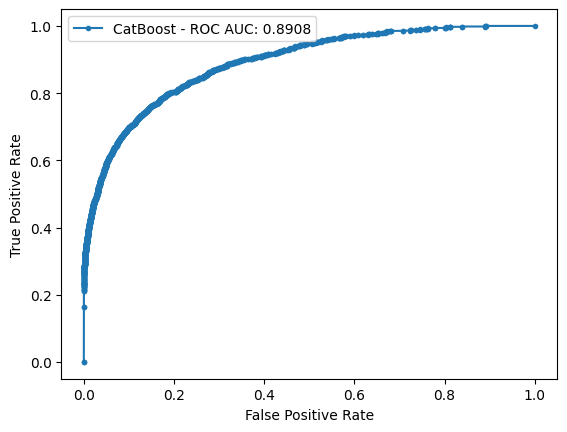

In [11]:
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import auc

fpr, tpr, _ = roc_curve(res["y_test"], res["y_pred"])
roc_auc = np.round(auc(fpr, tpr),4)
plt.plot(fpr, tpr, marker='.', label=f'CatBoost - ROC AUC: {roc_auc}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

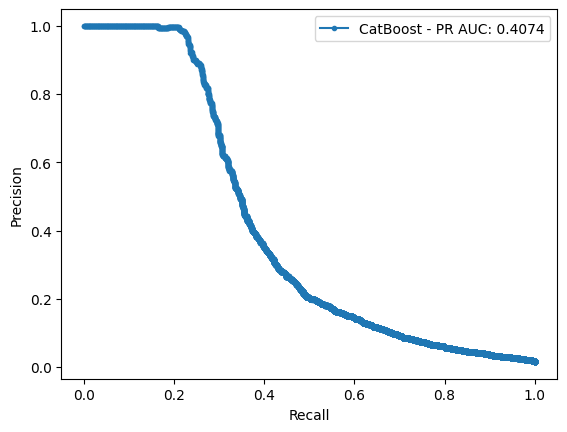

In [16]:
precision, recall, _ = precision_recall_curve(res["y_test"], res["y_pred"])
pr_auc = np.round(auc(recall, precision),4)
plt.plot(recall, precision, marker='.', label=f'CatBoost - PR AUC: {pr_auc}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [14]:
res["fea_imp"]

transactionAmount                  0.594791
posEntryMode                       0.468150
merchantCategoryCode               0.266390
customerId                         0.258742
merchantName                       0.257752
                                     ...   
isOverspent                        0.000362
sum_by_customerId_creditLimit      0.000328
expirationDateKeyInMatch           0.000271
countryMismatch                    0.000000
count_by_customerId_creditLimit    0.000000
Length: 148, dtype: float64

<Axes: >

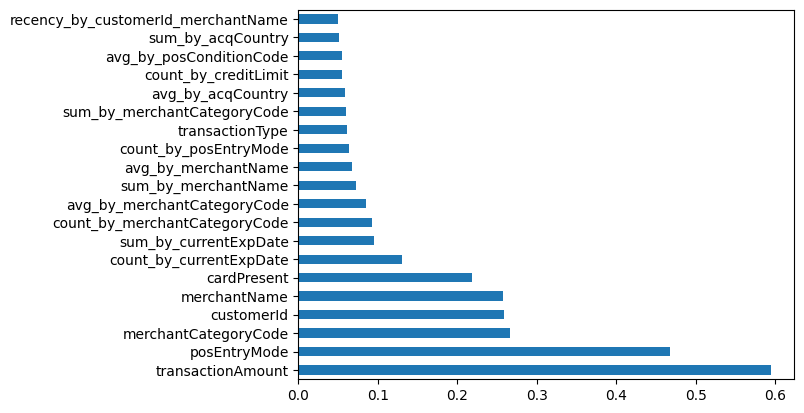

In [15]:
res["fea_imp"][:20].plot(kind="barh")